In [1]:
import kagglehub
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Download latest version
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

print("Path to dataset files:", path)

In [2]:
import os
import shutil
import kagglehub

# Download to KaggleHub cache (returns the local cache path)
src = kagglehub.dataset_download("innocentmfa/crm-sales-opportunities")
# Your desired subfolder in the current working directory
dst = r"C:\Users\alexa\OneDrive\Documents\Machine Learning Repos\Imperial\Module 25\ic_ai_course_capstone_submission\CRM data"
os.makedirs(dst, exist_ok=True)

# Copy everything over
shutil.copytree(src, dst, dirs_exist_ok=True)
print("Files copied to:", dst,"from: ",src)

Files copied to: C:\Users\alexa\OneDrive\Documents\Machine Learning Repos\Imperial\Module 25\ic_ai_course_capstone_submission\CRM data from:  C:\Users\alexa\.cache\kagglehub\datasets\innocentmfa\crm-sales-opportunities\versions\1


# Part 1 - Review the data for the CRM

In [3]:
file_path = os.path.join(dst, "accounts.csv")
accounts_data = pd.read_csv(file_path)
file_path = os.path.join(dst, "data_dictionary.csv")
data_dictionary_data = pd.read_csv(file_path)
file_path = os.path.join(dst, "products.csv")
products_data = pd.read_csv(file_path)
file_path = os.path.join(dst, "sales_pipeline.csv")
sales_pipeline_data = pd.read_csv(file_path)
file_path = os.path.join(dst, "sales_teams.csv")
sales_teams_data = pd.read_csv(file_path)

In [4]:
accounts_data.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [5]:
data_dictionary_data.head()

,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees


In [6]:
products_data.head()

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482


In [7]:
products_data["product"].unique()

array(['GTX Basic', 'GTX Pro', 'MG Special', 'MG Advanced',
       'GTX Plus Pro', 'GTX Plus Basic', 'GTK 500'], dtype=object)

In [8]:
sales_pipeline_data.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


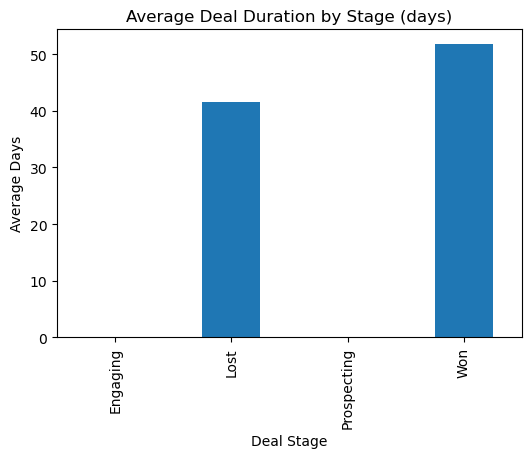

In [9]:
# Convert to datetime
df=sales_pipeline_data
df["engage_date"] = pd.to_datetime(df["engage_date"])
df["close_date"] = pd.to_datetime(df["close_date"], errors="coerce")  # NaT if still open
df["duration_days"] = (df["close_date"] - df["engage_date"]).dt.days

# -----------------------------
# 1. Average time for each deal_stage
avg_time = df.groupby("deal_stage")["duration_days"].mean()

avg_time.plot(kind="bar", figsize=(6,4))
plt.title("Average Deal Duration by Stage (days)")
plt.ylabel("Average Days")
plt.xlabel("Deal Stage")
plt.show()

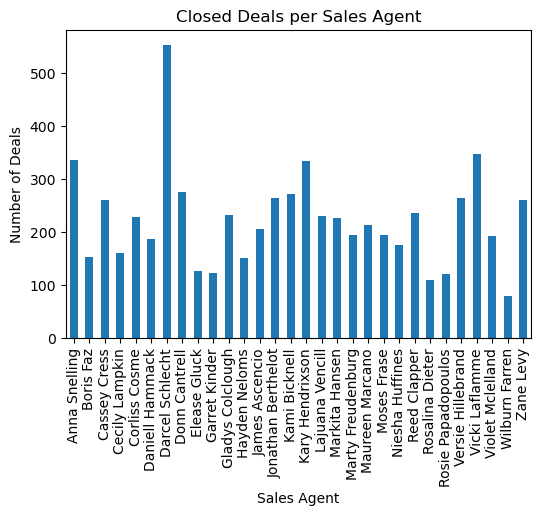

In [10]:
# 3. Number of closed deals per sales agent
closed_deals = df[df["deal_stage"].isin(["Won","Lost"])]  # adjust if you have other closed stages

closed_deals.groupby("sales_agent")["opportunity_id"].count().plot(
    kind="bar", figsize=(6,4)
)
plt.title("Closed Deals per Sales Agent")
plt.ylabel("Number of Deals")
plt.xlabel("Sales Agent")
plt.show()


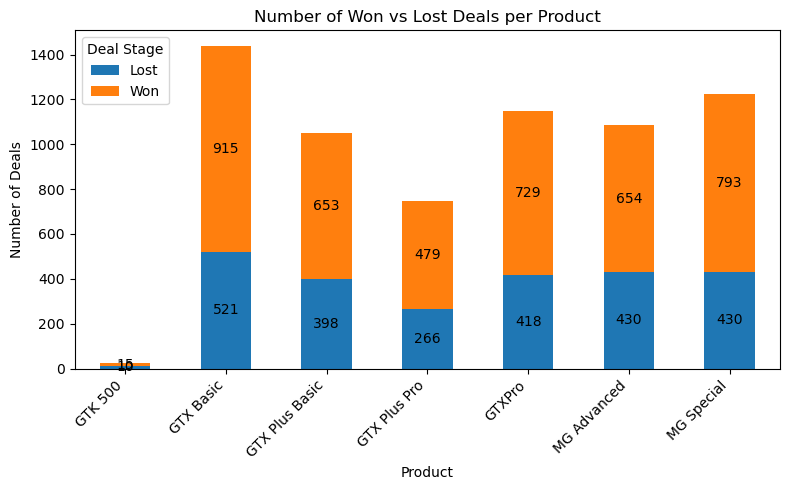

In [11]:

# 4. Number of Won/Lost deals per product
deal_counts = (
    df[df["deal_stage"].isin(["Won","Lost"])]
    .groupby(["product","deal_stage"])["opportunity_id"]
    .count()
    .unstack(fill_value=0)
)
pd.set_option("display.max_colwidth", 10)
ax = deal_counts.plot(kind="bar", stacked=True, figsize=(8,5))

plt.title("Number of Won vs Lost Deals per Product")
plt.ylabel("Number of Deals")
plt.xlabel("Product")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Deal Stage")

# --- Add numbers on the bars ---
for container in ax.containers:
    ax.bar_label(container, label_type="center")  # 'center' or 'edge'

plt.tight_layout()
plt.show()

In [12]:
sales_teams_data.head()

,sales_agent,manager,regional_office
0,Anna S...,Dustin...,Central
1,Cecily...,Dustin...,Central
2,Versie...,Dustin...,Central
3,Lajuan...,Dustin...,Central
4,Moses ...,Dustin...,Central


# Part 2 - Review the data for the products review 

In [13]:
dst = r"C:\Users\alexa\OneDrive\Documents\Machine Learning Repos\Imperial\Module 25\ic_ai_course_capstone_submission\CRM data"
file_path = os.path.join(dst, "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
CRM_client_reviews = pd.read_csv(file_path)

In [45]:
CRM_client_reviews.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [56]:
#CRM_client_reviews["name"].value_counts()
products = CRM_client_reviews["name"].value_counts().reset_index(name="count").rename(columns={"index":"deal_stage"})

In [61]:
# Disable truncation
pd.set_option("display.max_colwidth", None)
products.head(20)

,name,count
0,AmazonBasics AAA Performance Alkaline Batteries (36 Count),8343
1,AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,3728
2,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",2443
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",2370
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",1676
5,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",1425
6,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",1212
7,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",1024
8,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers",987
9,"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",883


In [64]:
# Create diagramm that shows roughly the same distribution of the reviwes and sales 

# Part 3  - Build a comprehensive data model 

In [105]:
# Mapping dictionary
product_map = {
    "GTX Plus Basic":"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",
    "GTXPro": "All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",
    "MG Special": "Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",
    "MG Advanced": "Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",
    "GTX Plus Pro": "Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",
    "GTK 500":"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black"
}

# 1. Replace values in 'product' according to dictionary
sales_pipeline_data["product"] = sales_pipeline_data["product"].replace(product_map)

# 2. Filter rows that actually changed
CRM_client_reviews_relevant_only = CRM_client_reviews[CRM_client_reviews["name"].isin(product_map.values())]
pd.set_option("display.max_colwidth", 30)
CRM_client_reviews_relevant_only.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,product_replaced,product
13386,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, ...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tab...",Electronics,http://i.ebayimg.com/thumb...,amazonfirehd88intablet16gb...,...,NaN,0.0,5,http://reviews.bestbuy.com...,While there are some apps ...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com...,"All-New Fire HD 8 Tablet, ...","All-New Fire HD 8 Tablet, ..."
13387,AVpfw2hvilAPnD_xh0rH,2017-01-11T06:58:33Z,2019-03-09T07:13:43Z,"Fire Kids Edition Tablet, ...",B018Y226XO,Amazon,"Fire Tablets,Learning Toys...","Toys & Games,Electronics",https://pisces.bbystatic.c...,"amazon/53004754,8416671033...",...,NaN,0.0,5,http://reviews.bestbuy.com...,great tablet for kids when...,2 year old loves it,betty,http://www.toysrus.com/pro...,"Fire Kids Edition Tablet, ...","Fire Kids Edition Tablet, ..."
13388,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, ...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tab...",Electronics,http://i.ebayimg.com/thumb...,amazonfirehd88intablet16gb...,...,NaN,0.0,4,http://reviews.bestbuy.com...,I bought one last year for...,2nd purchase,VanStriker,http://reviews.bestbuy.com...,"All-New Fire HD 8 Tablet, ...","All-New Fire HD 8 Tablet, ..."
13389,AVpfw2hvilAPnD_xh0rH,2017-01-11T06:58:33Z,2019-03-09T07:13:43Z,"Fire Kids Edition Tablet, ...",B018Y226XO,Amazon,"Fire Tablets,Learning Toys...","Toys & Games,Electronics",https://pisces.bbystatic.c...,"amazon/53004754,8416671033...",...,NaN,0.0,4,http://reviews.bestbuy.com...,Bought this for my 2 yr ol...,2yr old approved,Mike,http://www.toysrus.com/pro...,"Fire Kids Edition Tablet, ...","Fire Kids Edition Tablet, ..."
13390,AVpfw2hvilAPnD_xh0rH,2017-01-11T06:58:33Z,2019-03-09T07:13:43Z,"Fire Kids Edition Tablet, ...",B018Y226XO,Amazon,"Fire Tablets,Learning Toys...","Toys & Games,Electronics",https://pisces.bbystatic.c...,"amazon/53004754,8416671033...",...,NaN,0.0,5,http://reviews.bestbuy.com...,Kindle products are fantas...,3 year old granddaughter l...,Jeanie,http://www.toysrus.com/pro...,"Fire Kids Edition Tablet, ...","Fire Kids Edition Tablet, ..."


In [106]:
products_sales = sales_pipeline_data["product"].value_counts().reset_index(name="count").rename(columns={"index":"deal_stage"})
products_sales

,product,count
0,Fire HD 8 Tablet with Alex...,3249
1,"Fire Kids Edition Tablet, ...",1651
2,"All-New Fire HD 8 Tablet, ...",1480
3,"Fire Kids Edition Tablet, ...",1412
4,"Fire Kids Edition Tablet, ...",968
5,"Fire Tablet, 7 Display, Wi...",40


In [107]:
products_feedback = CRM_client_reviews_relevant_only["product"].value_counts().reset_index(name="count").rename(columns={"index":"deal_stage"})
products_feedback

,product,count
0,Fire HD 8 Tablet with Alex...,2443
1,"All-New Fire HD 8 Tablet, ...",2370
2,"Fire Kids Edition Tablet, ...",1676
3,"Fire Kids Edition Tablet, ...",1425
4,"Fire Kids Edition Tablet, ...",1212
5,"Fire Tablet, 7 Display, Wi...",1024


# Part 4  - build a recommendation model

In [110]:
# 2. How many deals are still open (no close_date)
open_deals = df["close_date"].isna().sum()
print("Number of Deals Still Open",open_deals)

Number of Deals Still Open 2089


## We will now build a a sales recommendation agent by firstly creating a sentiment model and training it on the  won deals. We will then apply this model to in-flight deals

# Conclusion